In [1]:
# this is using the genePathwayManifold virtual environment
import scvelo as scv
import scanpy
scv.logging.print_version()

Running scvelo 0.3.1 (python 3.11.5) on 2024-03-19 16:42.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization


In [3]:
adata = scv.datasets.gastrulation_erythroid()
adata

100%|██████████| 463M/463M [01:42<00:00, 4.73MB/s] 


AnnData object with n_obs × n_vars = 9815 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [4]:
# save the count matrices
spliced = adata.layers['spliced'].copy()
unspliced = adata.layers['unspliced'].copy()
gene_names = adata.var['Accession'].copy()

print(spliced.shape)
print(spliced[:5,:5].todense())
print(gene_names)

(9815, 53801)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
index
Xkr4        ENSMUSG00000051951
Gm37180     ENSMUSG00000103377
Gm37363     ENSMUSG00000104017
Gm37686     ENSMUSG00000103025
Gm37329     ENSMUSG00000103201
                   ...        
Gm29504     ENSMUSG00000100533
Gm20837     ENSMUSG00000096178
Mid1-ps1    ENSMUSG00000095134
Gm47283     ENSMUSG00000096768
Gm21742     ENSMUSG00000099871
Name: Accession, Length: 53801, dtype: object


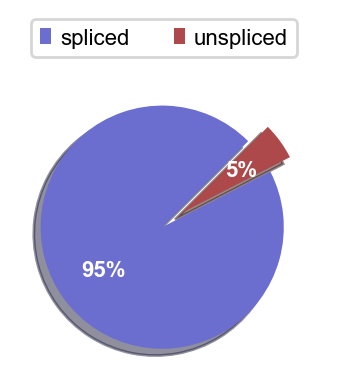

In [5]:
scv.pl.proportions(adata)

In [6]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


/var/folders/hs/22vv3mms6xbbkl2xk5frsnhc0000gp/T/ipykernel_60442/2386943043.py:4: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata)


In [7]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:08) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [8]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


In [9]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/12 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/

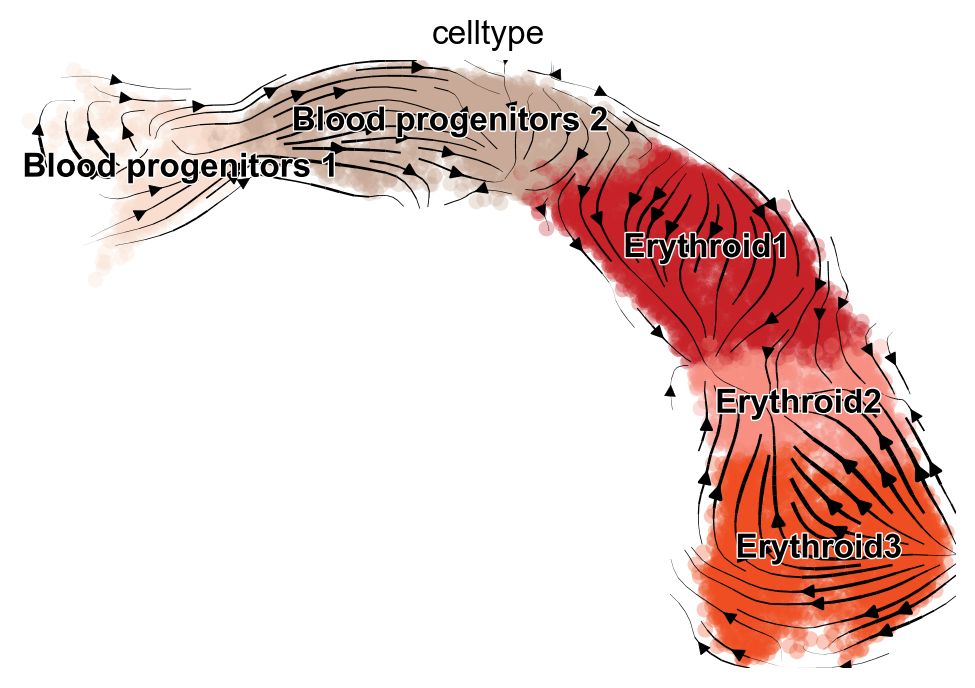

In [12]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color='celltype')

In [11]:
adata

AnnData object with n_obs × n_vars = 9815 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'celltype_colors', 'log1p', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [13]:
positions_dict = {gene: pos for pos, gene in enumerate(gene_names.index)}

positions = [positions_dict[gene] for gene in adata.var['Accession'].index]

spliced_subset = spliced[:,positions]
unspliced_subset = unspliced[:,positions]

In [14]:
adata.layers['spliced_original'] = spliced_subset
adata.layers['unspliced_original'] = unspliced_subset

In [15]:
print(adata.layers['spliced'][:5,:5].todense())
print("===")
print(adata.layers['spliced_original'][:5,:5].todense())

[[0.        0.        1.3236287 0.        0.       ]
 [1.7785966 0.        1.7785966 0.        0.       ]
 [1.0343747 1.0343747 0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]]
===
[[0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
adata.write_h5ad(
    filename="/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/zhaoheng/out/genePathwayManifold/velocity_conversions/scvelo_ethyroid_dataset.h5ad"
)